In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/home/akeemlag/Downloads/HR_comma_sep.csv")

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [17]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

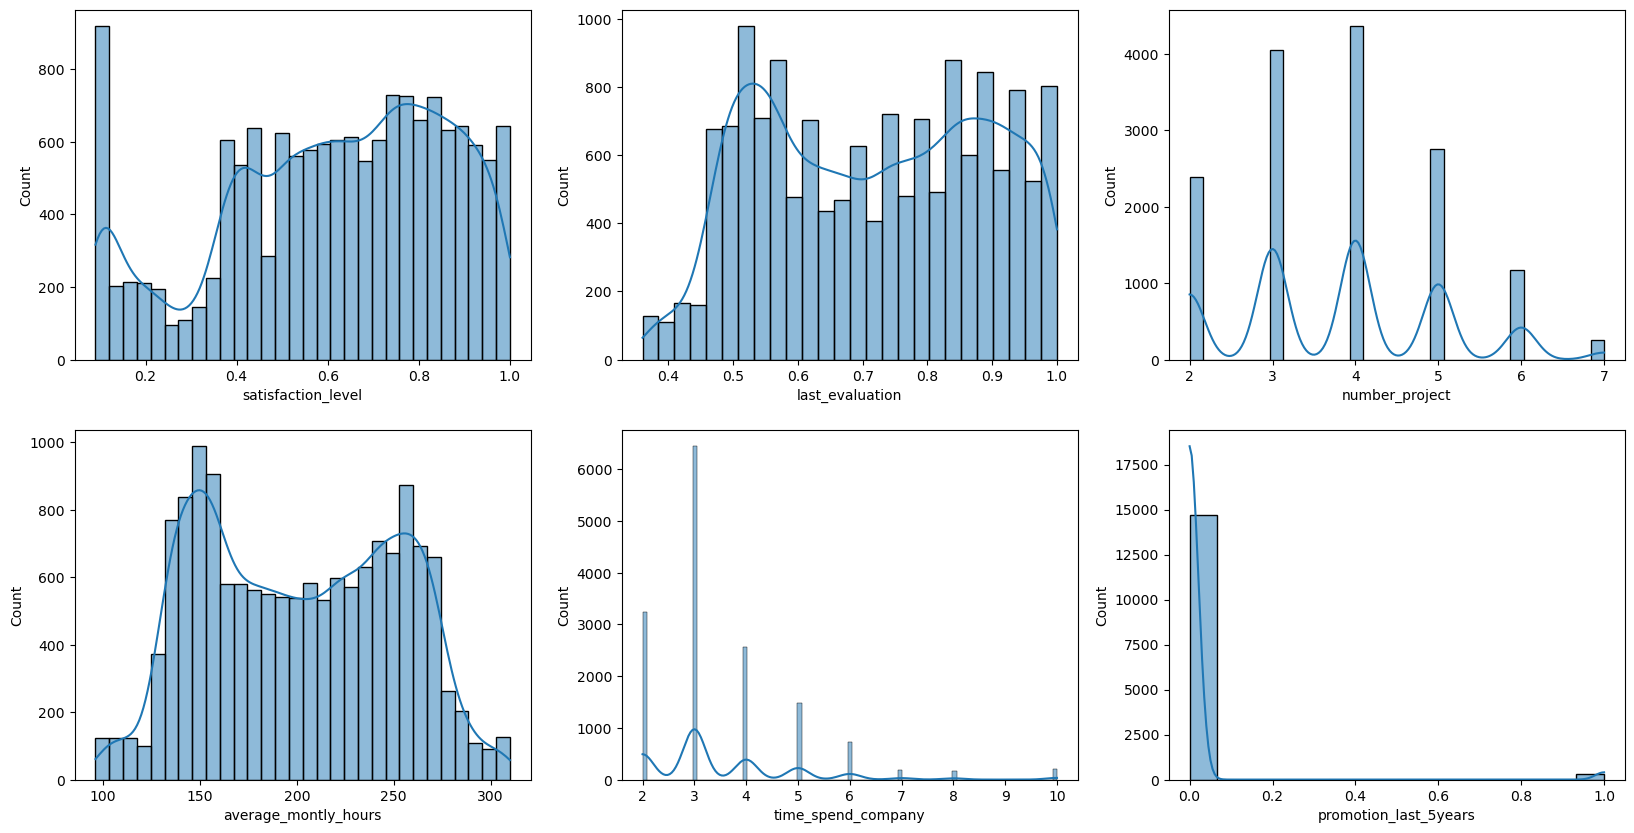

In [93]:
# Display the density for some columns
fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.histplot(df["satisfaction_level"], ax=ax[0,0], kde=True)
sns.histplot(df["last_evaluation"], ax=ax[0,1], kde=True)
sns.histplot(df["number_project"], ax=ax[0,2], kde=True)
sns.histplot(df["average_montly_hours"], ax=ax[1,0], kde=True)
sns.histplot(df["time_spend_company"], ax=ax[1,1], kde=True)
sns.histplot(df["promotion_last_5years"], ax=ax[1,2], kde=True);

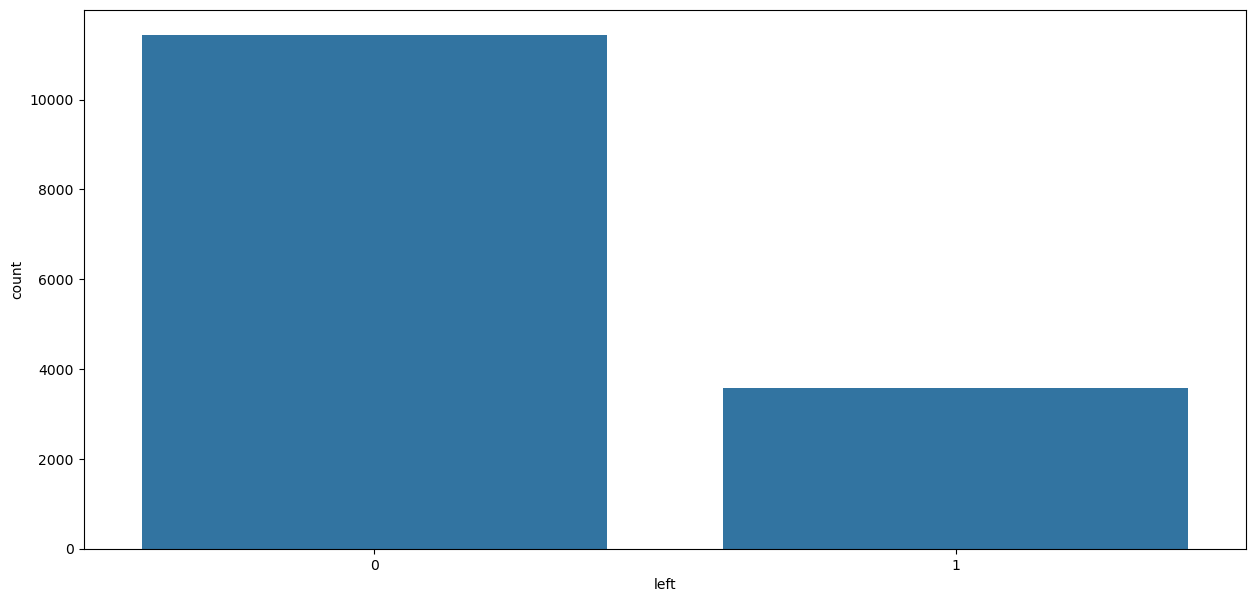

In [43]:
# Employees Count
fig = plt.figure(figsize=(15,7))
sns.countplot(x='left', data=df);

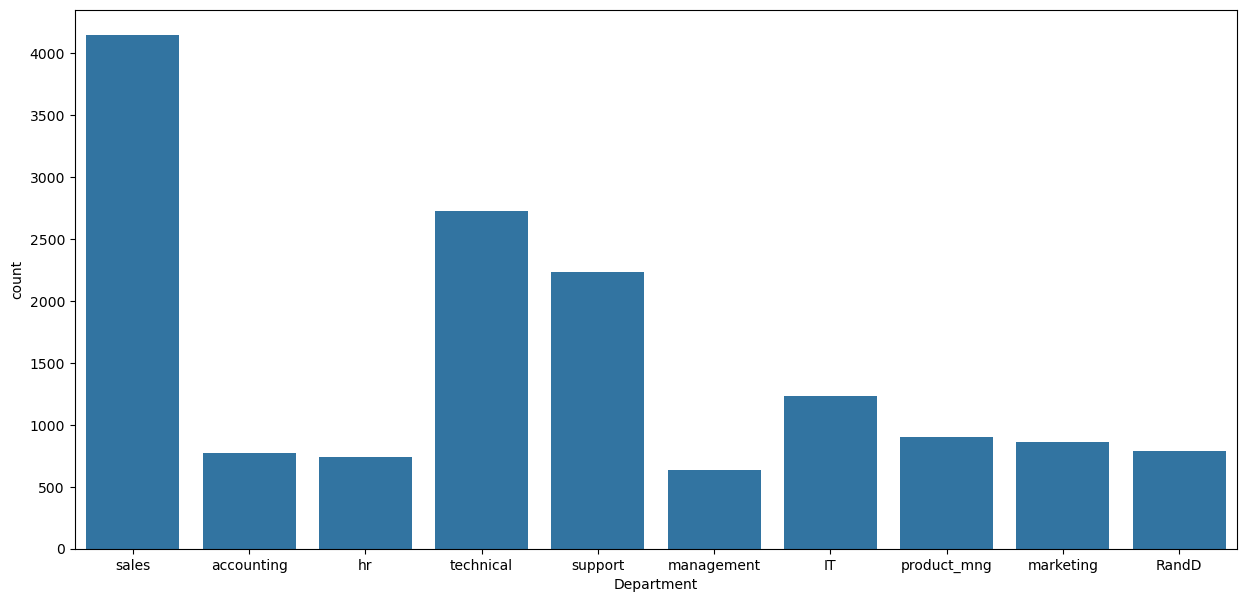

In [52]:
# Departmental Count
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='Department');

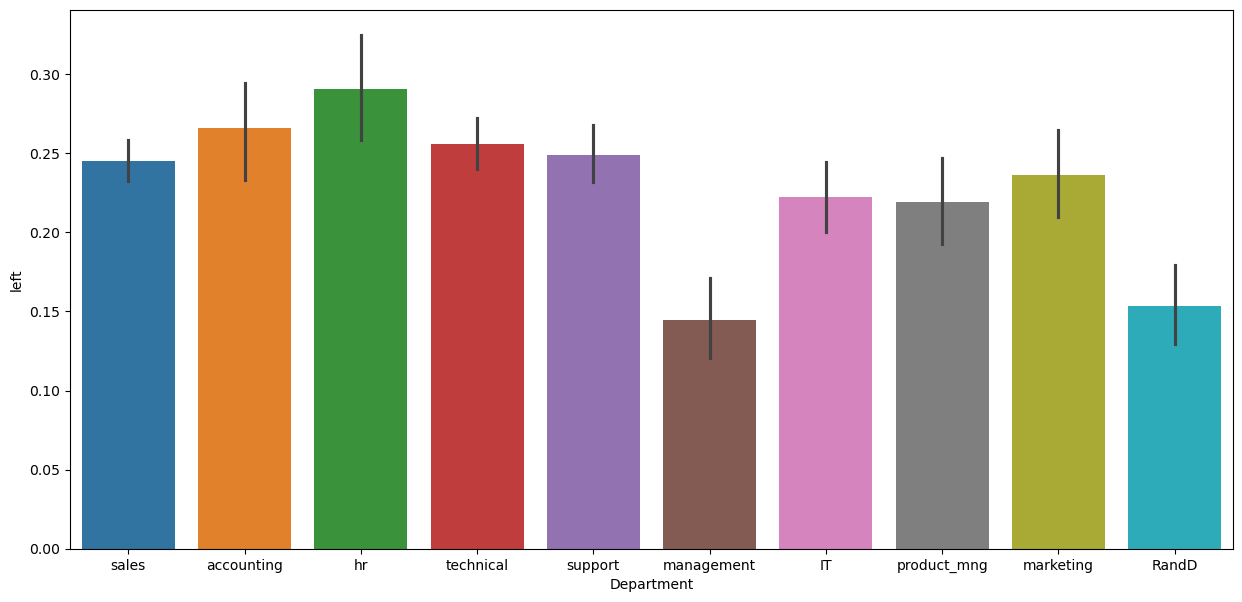

In [99]:
fig = plt.figure(figsize=(15,7))
sns.barplot(x="Department", y="left", data=df, hue='Department');

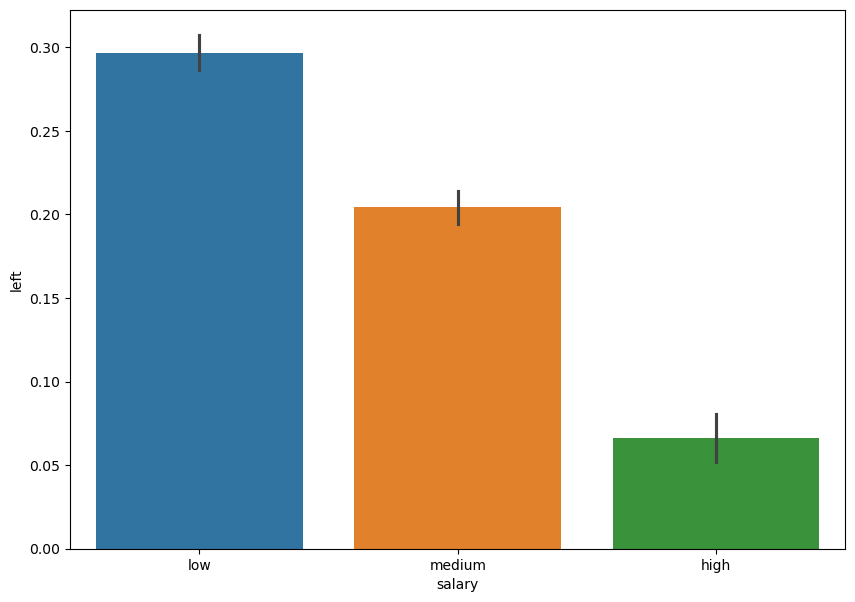

In [100]:
fig = plt.figure(figsize=(10,7))
sns.barplot(data=df, x="salary", y="left", hue="salary");

In [115]:
df.salary = df.salary.astype('category')

In [116]:
df.salary = df.salary.cat.reorder_categories(['low', 'medium', 'high'])

ValueError: items in new_categories are not the same as in old categories

In [117]:
df.salary = df.salary.cat.codes

In [118]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,0,False,False,False,False,False,False,False,False,True,False


In [113]:
departments = pd.get_dummies(df.Department)
Department = departments.drop('accounting', axis=1) # Evading dummy variable trap
df = df.drop('Department', axis='columns')
df = df.join(departments)

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,0,False,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,0,False,False,False,False,False,False,False,False,True,False


In [120]:
# How many employees left and how many stayed
n_employees = len(df)
n_employees

14999

In [121]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [123]:
(df.left.value_counts()/n_employees)*100

left
0    76.191746
1    23.808254
Name: count, dtype: float64

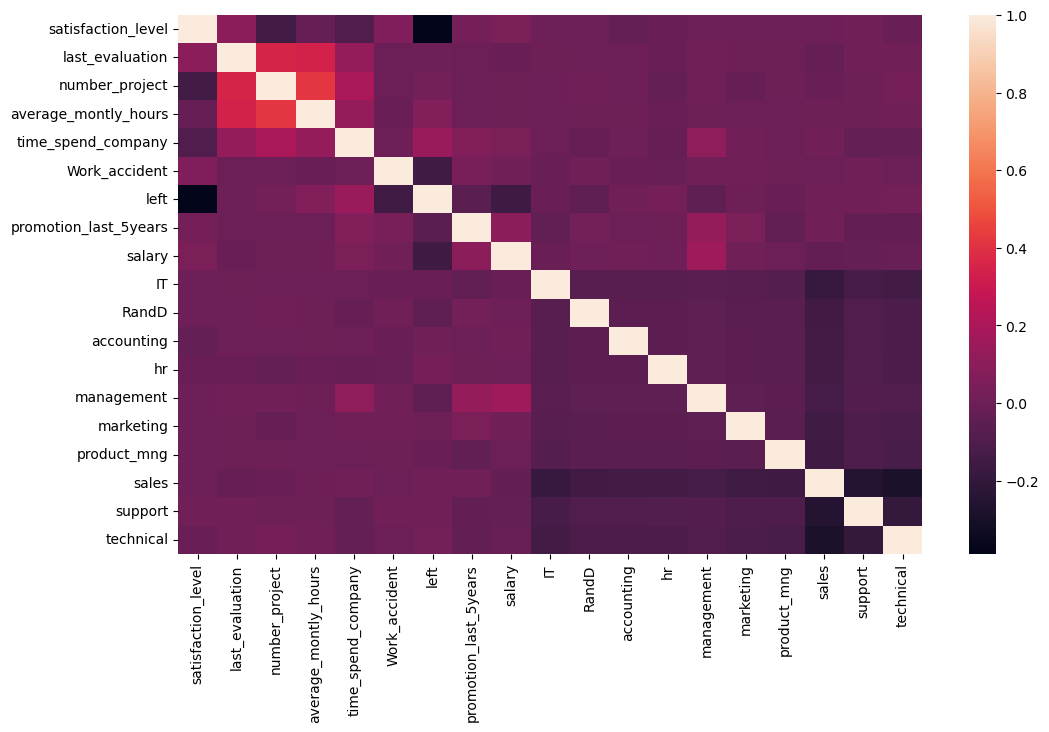

In [126]:
# Create a correlation Matrix
fig = plt.figure(figsize=(12, 7))
cor_mat = df.corr()
sns.heatmap(cor_mat);

In [143]:
X = df.drop('left', axis=1) # feature matrix
y = df.left # target vector

In [144]:
X, y = make_classification(random_state=42)

In [146]:
# Splitting our datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [131]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
14480,0.38,0.86,6,139,6,0,0,1,False,False,False,False,False,False,False,False,False,True
1934,0.78,0.93,4,225,5,0,0,1,False,False,False,False,False,False,False,True,False,False
7900,0.56,0.71,5,243,3,0,0,1,False,False,False,False,False,False,False,False,False,True
2952,0.96,0.62,4,217,2,0,0,1,False,False,False,False,False,False,False,False,True,False
4367,0.83,0.53,3,211,4,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0,0,False,False,False,False,False,False,False,False,True,False
13418,0.49,0.65,4,233,7,0,0,1,False,False,False,False,False,False,False,True,False,False
5390,0.66,0.73,5,249,2,0,0,1,False,False,False,False,False,False,False,False,True,False
860,0.79,1.00,4,218,5,0,0,0,False,False,False,False,False,False,False,True,False,False


In [132]:
y_train

14480    1
1934     1
7900     0
2952     0
4367     0
        ..
5191     0
13418    0
5390     0
860      1
7270     0
Name: left, Length: 11249, dtype: int64

In [147]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [148]:
pipeline.fit(X_train, y_train) # Train our model with these datasets


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [149]:
pipeline.score(X_test, y_test)

0.96

In [150]:
pipeline.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0])

In [151]:
y_test

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0])